#### This is a model trained to determine which audio files contain parts of an original song
The target (songs which include the original) and non-targets (songs that don't include parts of an original song) have been manually labeled.
<br>
For each audio file, I created a Mel spectrogram using the code /GitHub/MusicEngine/3.create_mel_spectrogram.ipynb
The MP3 and WAV files are stored on the external drive in the respective folders /Volumes/EXTERNAL/MusicEngine/mp3/ and /Volumes/EXTERNAL/MusicEngine/wav/

In [91]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Read the images
# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(2, size=(100, 1)), num_classes=2)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(2, size=(20, 1)), num_classes=2)


In [88]:
img_path = "/Volumes/EXTERNAL/MusicEngine/mel_spectrogram/cases/TARGET_Biz_Amulet.png"
img = image.load_img(img_path, target_size=(230, 345))



In [66]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


'/Volumes/EXTERNAL/MusicEngine/mel_spectrogram/cases/TARGET_Biz_Amulet.png'

In [89]:
image.img_to_array(img).shape

(230, 345, 3)

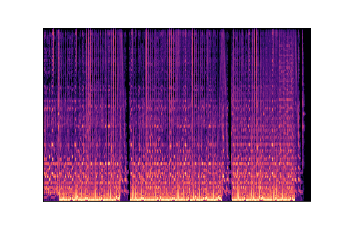

In [90]:
img

In [126]:
# Preprocess images
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over
#     (in batches) indefinitely. In order to make the most of our few training examples, we will "augment"
#     them via a number of random transformations, so that our model would never see twice the exact same picture.
#     This helps prevent overfitting and helps the model generalize better ->> https://keras.io/preprocessing/image/

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_path = "/Users/valentin/Documents/MusicEngine/model/train/cases/"
image = "TARGET_Biz_Amulet.png"

img = load_img(img_path + image, target_size=(460, 690))           # This is a PIL image
x = img_to_array(img)                                              # Numpy array with shape 3, 460, 690
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


# The .flow() generates batches of randomly transformed images and saves them to the `preview/` directory
img_generator = ImageDataGenerator(
   # rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')


i = 0
for batch in img_generator.flow(x, batch_size = 1,
                               save_to_dir = "/Users/valentin/Documents/MusicEngine/model/",
                               save_format = "jpeg"):
    i += 1
    if i > 10:
        break

In [34]:
# Specify the model using LSTM

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [37]:
# Specify the optimization algorithm for the backprop
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [38]:
# Specify the loss function and compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

Train on 100 samples, validate on 20 samples
Epoch 1/20
100/100 [==============================] - 6s - loss: 0.6932 - val_loss: 0.6823
Epoch 2/20
100/100 [==============================] - 6s - loss: 0.6908 - val_loss: 0.6803
Epoch 3/20
100/100 [==============================] - 6s - loss: 0.6923 - val_loss: 0.6806
Epoch 4/20
100/100 [==============================] - 6s - loss: 0.6918 - val_loss: 0.6797
Epoch 5/20
100/100 [==============================] - 6s - loss: 0.6930 - val_loss: 0.6801
Epoch 6/20
100/100 [==============================] - 6s - loss: 0.6919 - val_loss: 0.6829
Epoch 7/20
100/100 [==============================] - 6s - loss: 0.6915 - val_loss: 0.6837
Epoch 8/20
100/100 [==============================] - 7s - loss: 0.6948 - val_loss: 0.6858
Epoch 9/20
100/100 [==============================] - 7s - loss: 0.6935 - val_loss: 0.6853
Epoch 10/20
100/100 [==============================] - 7s - loss: 0.6922 - val_loss: 0.6833
Epoch 11/20
100/100 [=======================

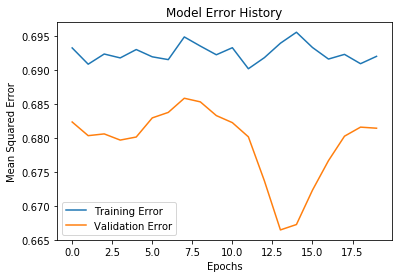

In [59]:
# Train model and plot accuracies
train_model = model.fit(x_train,
                        y_train,
                        batch_size=32,
                        epochs=20,
                        verbose=1,
                        validation_data = (x_test, y_test))

# print the training accuracy and validation loss at each epoch
# print the number of models of the network
print(train_model.history)
print(len(model.layers))

# Plot the errors of the epochs and MSE
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])

#  plt.plot(modelEstimate.history['val_acc'])
plt.title('Model Error History')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.legend(['Training Error', 'Validation Error'])
plt.show()


In [60]:
# Predict on the validation data
trainPredict = model.predict(x_test)

In [61]:
# Assess accuracy
model.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 0s


0.68140661716461182

In [ ]:
# Add a model checkpoint (from https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)

filepath="weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

model.fit_generator(
train_generator,
samples_per_epoch=nb_train_samples,
nb_epoch=nb_epoch,
validation_data=validation_generator,
nb_val_samples=nb_validation_samples,callbacks=callbacks_list)